In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('customer_dataset.csv', delimiter='\t')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
data.shape

(2240, 29)

In [5]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Year_Birth'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Kidhome'}>,
        <AxesSubplot:title={'center':'Teenhome'}>],
       [<AxesSubplot:title={'center':'Recency'}>,
        <AxesSubplot:title={'center':'MntWines'}>,
        <AxesSubplot:title={'center':'MntFruits'}>,
        <AxesSubplot:title={'center':'MntMeatProducts'}>,
        <AxesSubplot:title={'center':'MntFishProducts'}>],
       [<AxesSubplot:title={'center':'MntSweetProducts'}>,
        <AxesSubplot:title={'center':'MntGoldProds'}>,
        <AxesSubplot:title={'center':'NumDealsPurchases'}>,
        <AxesSubplot:title={'center':'NumWebPurchases'}>,
        <AxesSubplot:title={'center':'NumCatalogPurchases'}>],
       [<AxesSubplot:title={'center':'NumStorePurchases'}>,
        <AxesSubplot:title={'center':'NumWebVisitsMonth'}>,
        <AxesSubplot:title={'center':'AcceptedCmp3'}>,
        <Ax

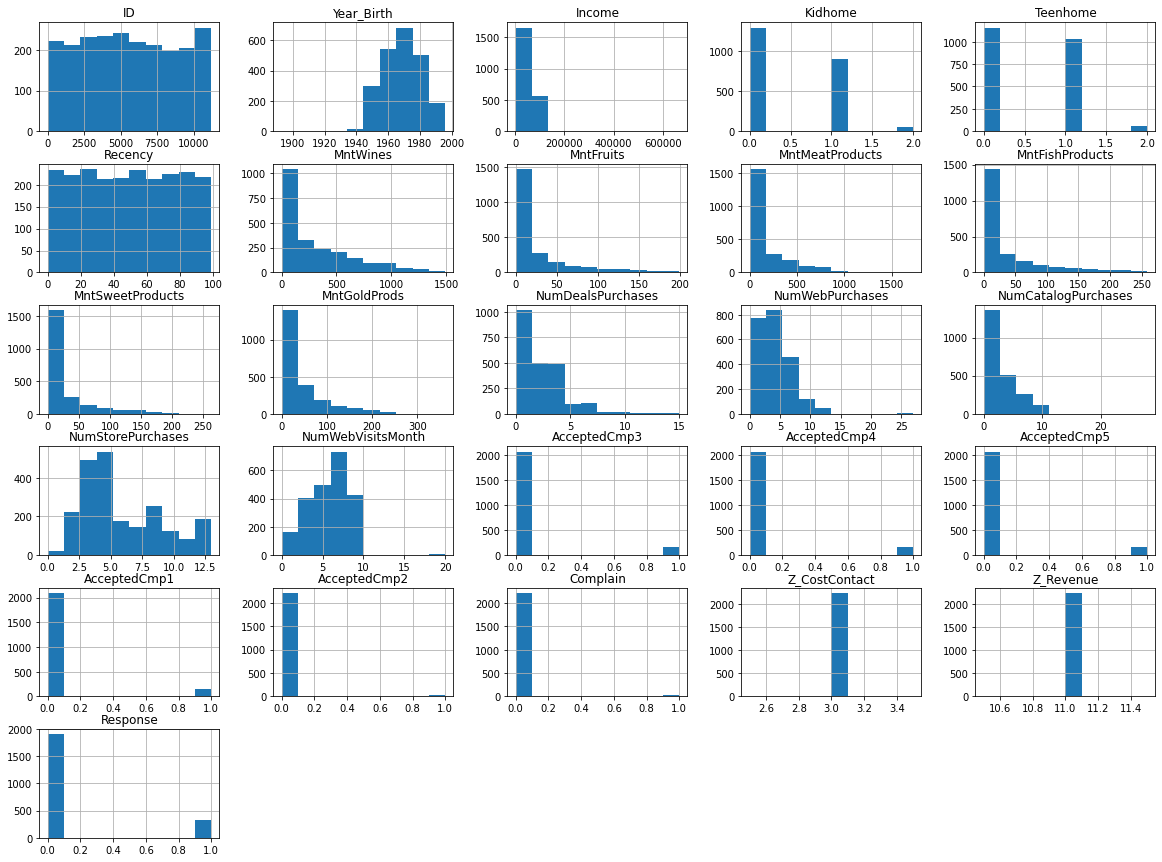

In [6]:
data.hist(figsize=(20,15))

In [7]:
# mostly variables are normally distributed, some are evenly distributed

In [8]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [9]:
# we divide the variables into class and continuous
continous_cols = ['Year_Birth', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Income']

class_cols = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']

In [10]:
# there are missing values in the data, delete the rows containing them
data = data.dropna()

<AxesSubplot:>

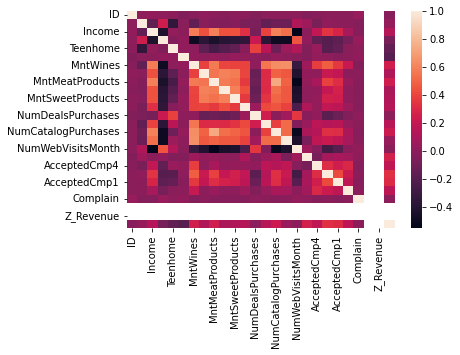

In [11]:
# check the correlation between numerical features
import seaborn as sns
sns.heatmap(data.corr())

In [12]:
# we see that some signs are strongly correlated with each other, it is possible,
# in principle, to use only some of them for learning

In [13]:
# check continuous data for outliers
data[continous_cols].describe()

,Year_Birth,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Income
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,1968.820397,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,52247.251354
std,11.985554,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,25173.076661
min,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1730.000000
25%,1959.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,35303.000000
50%,1970.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,51381.500000
75%,1977.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,68522.000000
max,1996.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,666666.000000


In [14]:
# at first glance, outliers were not detected, the fact that the maximum value 
# greatly exceeds the 3rd quartile in this case seems natural, 
# since there are people who are addicted to special types of products and, 
# due to their financial situation, spend much more than others

In [15]:
# let's move on to preprocessing, 
# we have already removed the missing values, 
# now we need to convert non-numeric parameters to numerical

In [16]:
# one hot encodding change the multicategorical features to many binary features
data = pd.get_dummies(data.drop(columns='Dt_Customer'))

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MntSweetProducts'>

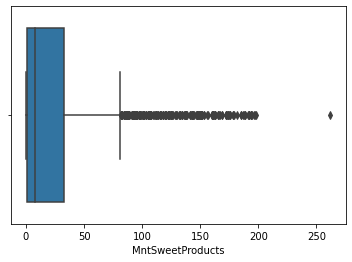

In [17]:
# look at the graphs to make sure there are no outliers
sns.boxplot(data['MntSweetProducts'])

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

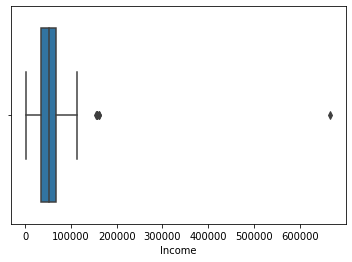

In [18]:
sns.boxplot(data['Income'])

In [19]:
# there is an obvious outlier, remove it
data = data.loc[data['Income'] < 600000]

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(data[continous_cols + class_cols])

finalDf = pd.DataFrame(data = principalComponents , columns =\
                           ['principal component 1', 'principal component 2'])

In [22]:
import matplotlib.pyplot as plt

In [37]:
fig, ax= plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
colors = ['r', 'g', 'b']
for color in colors:
    ax.scatter(finalDf['principal component 1']
               , finalDf['principal component 2']
               , c = color
               , s = 50)
ax.grid()

<Figure size 576x576 with 0 Axes>

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [26]:
kmeans = KMeans(init="random",n_clusters=3,n_init=10, max_iter=100)

In [27]:
kmeans.fit(data)

KMeans(init='random', max_iter=100, n_clusters=3)

In [28]:
kmeans.cluster_centers_

array([[ 5.76474052e+03,  1.96742857e+03,  7.69856953e+04,
         8.45481050e-02,  3.51311953e-01,  4.90204082e+01,
         6.16419825e+02,  5.69344023e+01,  3.97829446e+02,
         8.29037901e+01,  6.00743440e+01,  7.02551020e+01,
         1.60641399e+00,  5.39358601e+00,  5.45918367e+00,
         8.39941691e+00,  3.15160350e+00,  6.85131195e-02,
         1.35568513e-01,  2.30320700e-01,  1.83673469e-01,
         2.62390671e-02,  7.28862974e-03,  3.00000000e+00,
         1.10000000e+01,  2.34693878e-01,  7.58017493e-02,
        -5.20417043e-17,  5.30612245e-01,  1.54518950e-01,
         2.39067055e-01,  2.91545190e-03,  4.33680869e-19,
         1.00583090e-01,  3.89212828e-01,  2.04081633e-01,
         2.60932945e-01,  4.22740525e-02,  1.62630326e-18],
       [ 5.36861069e+03,  1.96597710e+03,  5.24356705e+04,
         4.05852417e-01,  8.21882952e-01,  4.94389313e+01,
         2.93220102e+02,  1.89402036e+01,  9.94198473e+01,
         2.51819338e+01,  1.80610687e+01,  4.58511450e+

In [33]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

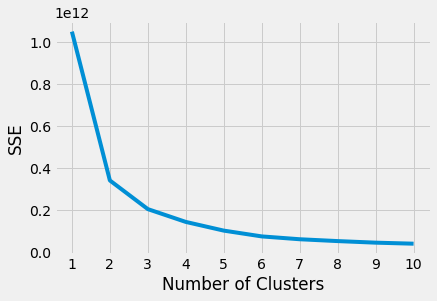

In [34]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [35]:
# using the elbow method, we can conclude that the appropriate number of clusters is 3

In [38]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [39]:
data['label'] = kmeans.predict(data)

In [40]:
data['label']

0       2
1       2
2       1
3       0
4       2
       ..
2235    2
2236    2
2237    2
2238    1
2239    2
Name: label, Length: 2215, dtype: int32

In [43]:
data_0 = data.loc[data['label'] == 0]
data_1 = data.loc[data['label'] == 1]
data_2 = data.loc[data['label'] == 2]

(array([  1.,   0.,   0.,   0.,   1.,  95., 198., 249., 204.,  38.]),
 array([1893. , 1902.9, 1912.8, 1922.7, 1932.6, 1942.5, 1952.4, 1962.3,
        1972.2, 1982.1, 1992. ]),
 <BarContainer object of 10 artists>)

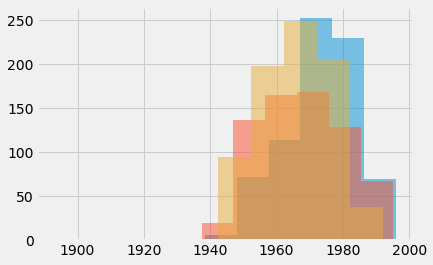

In [49]:
column = continous_cols[0]
plt.hist(data_0[column], alpha = 0.5)
plt.hist(data_1[column], alpha = 0.5)
plt.hist(data_2[column], alpha = 0.5)

(array([95., 74., 78., 76., 74., 79., 80., 71., 76., 83.]),
 array([40442., 42870., 45298., 47726., 50154., 52582., 55010., 57438.,
        59866., 62294., 64722.]),
 <BarContainer object of 10 artists>)

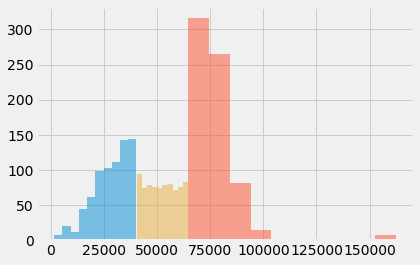

In [50]:
column = 'Income'
plt.hist(data_0[column], alpha = 0.5)
plt.hist(data_1[column], alpha = 0.5)
plt.hist(data_2[column], alpha = 0.5)

In [51]:
# it is immediately clear that the clusters differ greatly in income, which is logical and expected

(array([588.,  75.,  54.,  22.,  15.,   8.,  10.,   5.,   4.,   5.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

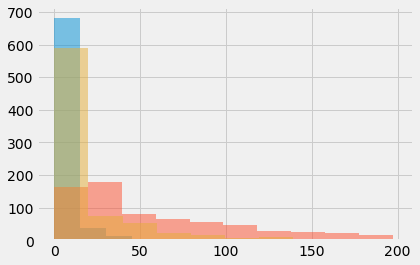

In [52]:
column = 'MntFruits'
plt.hist(data_0[column], alpha = 0.5)
plt.hist(data_1[column], alpha = 0.5)
plt.hist(data_2[column], alpha = 0.5)

(array([485.,   0.,   0.,   0.,   0., 283.,   0.,   0.,   0.,  18.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

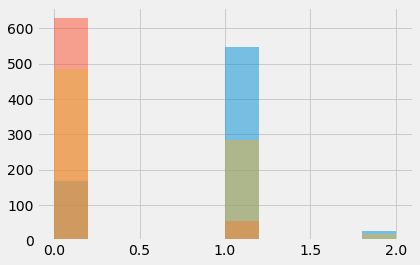

In [54]:
column = 'Kidhome'
plt.hist(data_0[column], alpha = 0.5)
plt.hist(data_1[column], alpha = 0.5)
plt.hist(data_2[column], alpha = 0.5)

In [55]:
# This feature also shows significant differences between groups.

In [ ]:
№ 